In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from ogw.barycenter import Barycenter
from ogw.data_loader import build_noisy_circular_graph
from ogw.dist import shortest_path
from ogw.gwtil_bary import eigen_projection
np.random.seed(30)


In [2]:

''' generate multiple graphs '''
S = 8
Gs = [build_noisy_circular_graph(np.random.randint(15, 25),
                                 with_noise=False,
                                 structure_noise=True,
                                 p=4) for _ in range(S)]
As = [nx.adjacency_matrix(G.nx_graph).toarray() for G in Gs]
Ls = [nx.laplacian_matrix(G.nx_graph) for G in Gs]
Ds = [shortest_path(A) for A in As]
ps = [np.ones(Ls[i].shape[0]) / Ls[i].shape[0] for i in range(len(Ls))]
lambdas = np.ones(len(Gs)) / len(Gs)


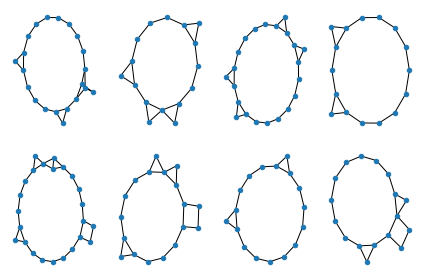

In [3]:
''' plot samples '''
fig = plt.figure(tight_layout=True)
for i in range(8):
    plt.subplot(2, 4, 1 + i)
    nx.draw(Gs[i].nx_graph, pos=nx.kamada_kawai_layout(Gs[i].nx_graph), node_size=20)

plt.savefig("barycenter_syn_samples.pdf")

In [4]:
''' '''
N = 20
p = np.ones(N) / N


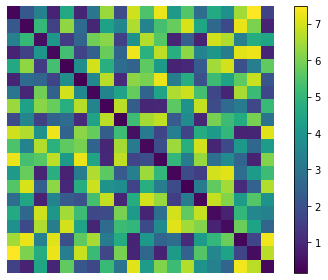

/home/hjin/miniconda3/envs/ogw/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


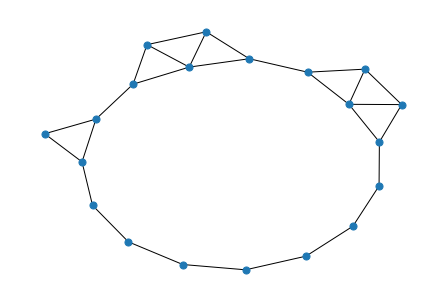

In [5]:
bary = Barycenter(topo_metric='gw', dist_func='sp')
C, log = bary.optim_C(N, Ds, ps, p, lambdas, log=True, method="closed-form", verbose=False)
A = bary.optim_A_from_C(C)
G = nx.from_numpy_array(A)

fig = plt.figure(tight_layout=True)
plt.imshow(C)
plt.axis("off")
plt.colorbar()
# plt.savefig("barycenter_syn_gw_C.pdf")
fig = plt.figure(tight_layout=True)
nx.draw(G, pos=nx.kamada_kawai_layout(G), node_size=50)
# plt.savefig("barycenter_syn_gw_A.pdf")



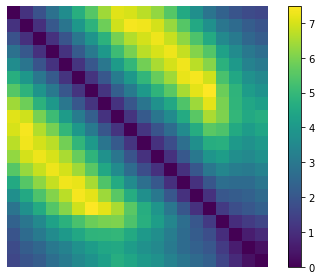

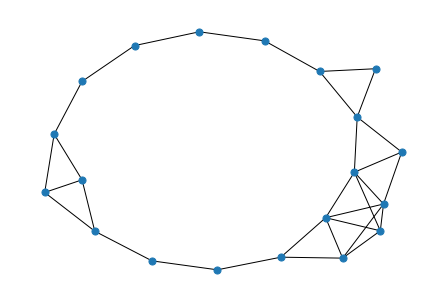

In [6]:
bary = Barycenter(topo_metric='gwtil_ub', dist_func='sp')
C, log = bary.optim_C(N, Ds, ps, p, lambdas, log=True, method="closed-form", verbose=False)
# update with eigen projection
C = sum([eigen_projection(C, Ds[i]) * lambdas[i] for i in range(len(Ds))])
A = bary.optim_A_from_C(C)
G = nx.from_numpy_array(A)

fig = plt.figure(tight_layout=True)
plt.imshow(C)
plt.axis("off")
plt.colorbar()
# plt.savefig("barycenter_syn_ogw_ub_C.pdf")
fig = plt.figure(tight_layout=True)
nx.draw(G, pos=nx.kamada_kawai_layout(G), node_size=50)
# plt.savefig("barycenter_syn_ogw_ub_A.pdf")


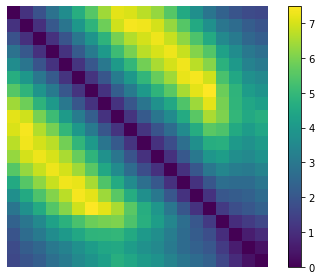

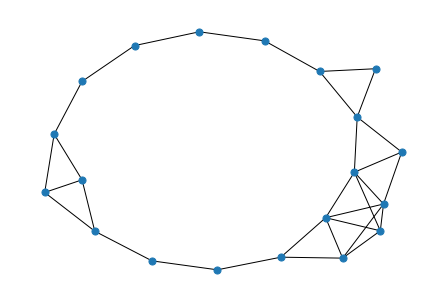

In [7]:
bary = Barycenter(topo_metric='gwtil_lb', dist_func='sp')
C, log = bary.optim_C(N, Ds, ps, p, lambdas, log=True, method="closed-form", verbose=False)
# update with eigen projection
C = sum([eigen_projection(C, Ds[i]) * lambdas[i] for i in range(len(Ds))])
A = bary.optim_A_from_C(C)
G = nx.from_numpy_array(A)

fig = plt.figure(tight_layout=True)
plt.imshow(C)
plt.axis("off")
plt.colorbar()
# plt.savefig("barycenter_syn_ogw_lb_C.pdf")
fig = plt.figure(tight_layout=True)
nx.draw(G, pos=nx.kamada_kawai_layout(G), node_size=50)
# plt.savefig("barycenter_syn_ogw_lb_A.pdf")
